# New York City Taxi & Limousine Commission (NYC TLC)
## Multiple Linear Regression Analysis for Taxi Ride Fare Project

#### Overview:
Purpose: Construct a multiple linear regression model to estimate taxi fares and explore the relationship between fare amounts and relevant variables.\
Objective: Build predictive model(s) for taxi ride fares to increase taxi driver profitability.

**Part 1:** EDA & Data Preparation
- Uni/Bi/Multi Variate Analysis
- Feature Engineering, Imputations, Data Cleaning
- Checking Model Assumptions

**Part 2:** Model Building and Evaluation
- Data Preparation - Dummy Encoding, Transformations, Data Leakage Mitigation, Scaling
- Model Training, Testing
- Checking Model Assumptions
- Model Evaluations

**Part 3:** Interpreting Model Results, Conduct Final Model Evaluation
- Results Visualizations
- Model Interpretations
- Full Dataset Predictions and Performance Evaluation
  
**Part 4:** Conclusion

### **Change Log**

2024_0512, S. Souto, Initial Version

### **Data Sources**

1. Original data: NYC.gov: "2017_Yellow_Taxi_Trip_Data.csv"

### **Notebook Setup**

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np

# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions
from datetime import date
from datetime import datetime
from datetime import timedelta

# Packages for MLR, Confusion Matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
# Notebook setup
pd.set_option('display.max_columns', None)

## Part 1: EDA & Data Preparation
**Note:**  Refer to the previous comprehensive EDA effort for in-depth analysis.

### Data Loading

In [3]:
# Load dataset into dataframe, save copy
df0 = pd.read_csv('data/2017_Yellow_Taxi_Trip_Data.csv')
df1 = df0.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Initial Exploration

#### Check for missing, duplicate data

In [5]:
# Check for duplicates
print('Shape of dataframe:', df1.shape)
print('Shape of dataframe with duplicates dropped:', df1.drop_duplicates().shape)

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)


In [6]:
# Check for missing values
print('Total count of missing values:', df1.isna().sum().sum())

Total count of missing values: 0


In [7]:
# Display missing values per column in dataframe
print('Missing values per column:')
df1.isna().sum()

Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

#### Summary Statistics

In [8]:
# Display descriptive stats
df1.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


The summary statistics reveal significant outliers in several variables, including notably high values for tip amount (\\$200) and total amount (\\$1,200).

During comprehensive EDA analysis, there were items that stood out:

- Not all variables appear to be required for prediction of fares and some can be removed.
- Datetime columns can be utilized to derive a trip duration column.
- Negative amounts from summary require further explanation, as does values not covered in data dictionary.

Several columns exhibit data values that are not fully explained in the provided data dictionary:  These are: `RateCodeID`, `extra`, `mta_tax`, `improvement_surcharge`.  Furthermore, their values appear consistent throughout the dataset, suggesting limited predictive power.

### Feature Engineering

#### Datetime Conversions

In [9]:
# Check the format of the data
df1['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [10]:
# Convert date strings to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df1['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df1['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
# Convert `tpep_dropoff_datetime` to datetime format
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df1['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df1['tpep_dropoff_datetime'].dtype)


Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


#### Create duration column

Derive`duration` from new datetime columns to represent the total number of minutes for the ride.

In [11]:
# Create `duration` column
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [12]:
df1.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


### Univariate Analysis

Identify and address outliers in important key features.

Potential key predictors for the model include:
- `fare_amount`
- `trip_distance`
- `duration`

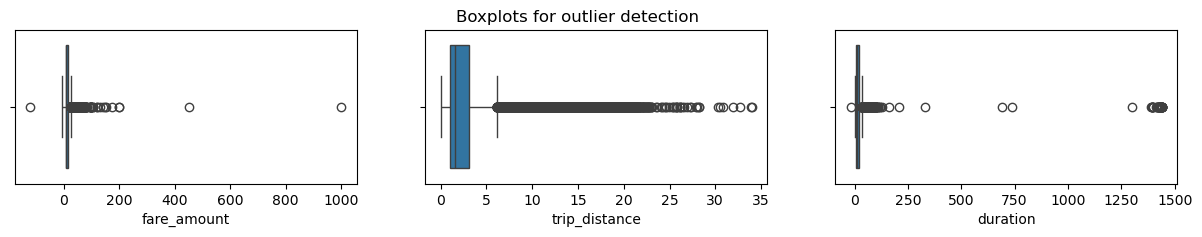

In [13]:
## Box plot for each key feature
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df1['fare_amount'])
sns.boxplot(ax=axes[1], x=df1['trip_distance'])
sns.boxplot(ax=axes[2], x=df1['duration'])
plt.show();

Outliers exist across all three variables, with some values significantly deviating from the norm.

Given NYC's geographic dimensions, trip distances of up to 35 miles are plausible. While extreme outliers in fare amount and duration warrant further investigation, trip distance outliers are less likely to require removal.

Each contain instances where the value is zero, which is illogical given their respective definitions. These zero values should be investigated.

### Imputations

##### `fare_amount` outliers

In [14]:
df1['fare_amount'].describe(include='all')

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [15]:
sum(df1['fare_amount']==0)

6

Negative values are anomalous. Because zero values might represent immediately canceled trips, these may be valid.

The dataset contains an unusually high maximum fare of nearly \\$1,000. Given this extreme value and the relatively small interquartile range of \\$8, a fare cap of \\$26.50 determined by the standard outlier detection method `Q3 + (1.5 * IQR)` seems insufficient. A more appropriate cap of \\$62.50 (factor of 6) will be applied to mitigate the impact of outliers on subsequent analysis.

In [16]:
# Low values: Impute values less than $0 with 0
df1.loc[df1['fare_amount'] < 0, 'fare_amount'] = 0
df1['fare_amount'].min()

0.0

Create imputer and impute the maximum value as `Q3 + (6 * IQR)`

In [17]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df1.loc[df1[col] > upper_threshold, col] = upper_threshold
        print(df1[col].describe())
        print()

In [18]:
#High values: impute with iqr factor of 6
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



##### `trip_distance` outliers

In [19]:
df1['trip_distance'].describe(include='all')

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [20]:
sum(df1['trip_distance']==0)

148

In [21]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df1['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

Trip distances are recorded precisely, but there are a small number (148 out of  almost 23,000) of zero-distance trips, possibly due to cancellations. Given the low frequency of these instances, imputing values is unnecessary and will not significantly impact the model. Therefore, the trip_distance outliers will remain unchanged.

##### `duration` outliers

In [22]:
df1['duration'].describe(include='all')

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

Outliers exist both below and above the expected range for duration. 

Negative values are clearly erroneous. To address outliers at the upper end, we will apply the same outlier detection method used for fare amount, calculating a threshold based on the interquartile range (IQR) using a factor of six.

In [23]:
# Impute the high outliers
# Imputer will also change negative values to zero
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Additional Feature Engineering

##### Create `mean_duration`, `mean_distance` columns

Trip duration cannot be used as a predictive feature since it is determined after the trip ends. Factors influencing travel time include traffic conditions, weather, and road infrastructure.  Therefore, we are using the statistics of trips we do know to generalize about ones we do not know:

Determine mean trip times for routes with matching pickup and dropoff points:

1. Combine pickup and dropoff locations into a single pickup_dropoff identifier.
2. Calculate average trip duration for each unique pickup_dropoff combination.
3. Create a lookup table mapping pickup_dropoff pairs to their average durations.
4. Replace pickup_dropoff values with corresponding average durations in a new mean_duration column.


In [24]:
# Create auxiliary `pickup_dropoff` column of pickup/dropoff concatenated pairs
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)

In [25]:
# Use auxiliary column to create a df of mean trip durations per pickup/dropoff group
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

In [26]:
# Convert grouped df to dictionary, which will contain the unique id pair (key) and mean duration (value).
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to remove the trip_distance as a key (removes the key name)
grouped_dict = grouped_dict['duration']

In [27]:
# 1. Create a mean_duration column that is a copy of the pickup_dropoff auxiliary column
df1['mean_duration'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_duration` column
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)

Verify:

In [28]:
# 1. Ensure every entry was mapped
print('Number of non-mapped values: ', df1['mean_duration'].isna().sum())
print('')
# 2.Choose one of the parings to test with
print(df1['pickup_dropoff'].head())
print('')
# 3. Compare before and after:
df1[(df1['PULocationID']==262) & (df1['DOLocationID']==236)][['pickup_dropoff','duration','mean_duration']].head(10)

Number of non-mapped values:  0

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object



,pickup_dropoff,duration,mean_duration
2,262 236,7.200000,7.25
464,262 236,7.916667,7.25
615,262 236,8.683333,7.25
1090,262 236,5.200000,7.25
1525,262 236,8.050000,7.25
2007,262 236,6.383333,7.25
2081,262 236,7.333333,7.25
2583,262 236,4.433333,7.25
3184,262 236,11.200000,7.25
3696,262 236,7.050000,7.25


Repeat process to create mean_distance

In [29]:
# Use auxiliary column to create a df of mean trip distances per pickup/dropoff group
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

In [30]:
# Convert grouped df to dictionary, which will contain the unique id pair (key) and mean distance (value).
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to remove the trip_distance as a key (removes the key name)
grouped_dict = grouped_dict['trip_distance']

In [31]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff auxiliary column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

Verify:

In [32]:
# 1. Ensure every entry was mapped
print('Number of non-mapped values: ', df1['mean_distance'].isna().sum())
print('')
# 2.Choose one of the parings to test with
print(df1['pickup_dropoff'].head())
print('')
# 3. Compare before and after:
df1[(df1['PULocationID']==262) & (df1['DOLocationID']==236)][['pickup_dropoff','trip_distance','mean_distance']].head(10)

Number of non-mapped values:  0

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object



,pickup_dropoff,trip_distance,mean_distance
2,262 236,1.00,0.881429
464,262 236,0.98,0.881429
615,262 236,0.70,0.881429
1090,262 236,0.70,0.881429
1525,262 236,0.80,0.881429
2007,262 236,0.80,0.881429
2081,262 236,0.70,0.881429
2583,262 236,0.70,0.881429
3184,262 236,1.19,0.881429
3696,262 236,0.84,0.881429


##### Create `day`,`month` columns

Use pickup date to create day (name of day) and month (name of month) columns.

In [33]:
# Create 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

##### Create `rush_hour` column

1. Classify rush hour as weekdays (Monday to Friday) between 6:00 AM and 10:00 AM or 4:00 PM and 8:00 PM.

2. Create a binary indicator column `rush_hour` where 0 denotes rush hour and 1 represents non-rush hour periods.

3. Create *rush_hourizer()* function to apply to `rush_hour` column

In [34]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour.astype('int64')

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [35]:
# create function
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [36]:
# Apply `rush_hourizer()` to the new column
df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1)
df1[['day','rush_hour']].head(10)

,day,rush_hour
0,saturday,0
1,tuesday,0
2,friday,1
3,sunday,0
4,saturday,0
5,saturday,0
6,wednesday,1
7,tuesday,1
8,saturday,0
9,friday,0


### Bivariate Analysis

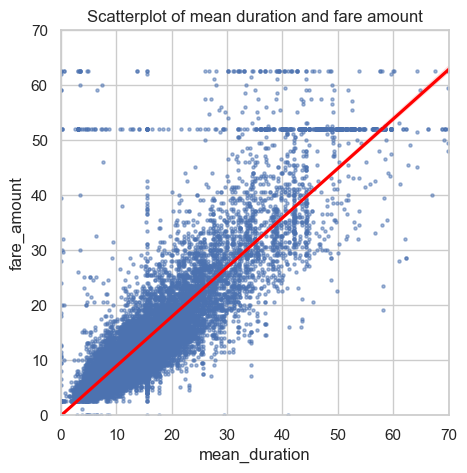

In [37]:
# Create a scatter plot of mean duration and mean distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['mean_duration'],
            y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Scatterplot of mean duration and fare amount')
plt.show()

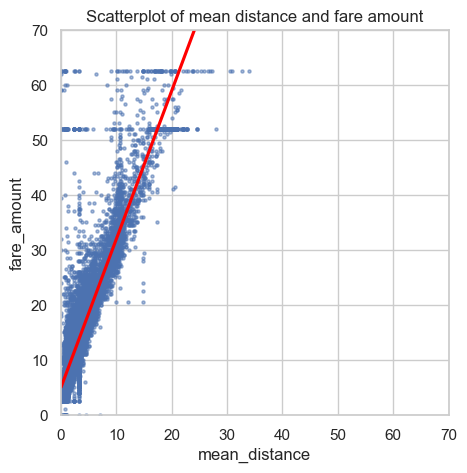

In [38]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['mean_distance'],
            y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Scatterplot of mean distance and fare amount')
plt.show()

Both `mean duration` and `mean_distance` correlate with the target variable.

##### Deep Dive into High Fare Trips

Examination of the horizontal lines for fare amounts above \\$50:

In [39]:
df1[df1['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

84 observations for fare_amounts of \\$62.50 come from outlier imputations - these were previously outliers.

514 observations for fare amounts of \\$52 will be examined:

In [40]:
fares_52 = df1[df1['fare_amount'] == 52].copy()

In [41]:
fares_52[['RatecodeID','PULocationID','DOLocationID','tolls_amount']].head(25)

,RatecodeID,PULocationID,DOLocationID,tolls_amount
11,2,236,132,5.54
110,2,132,163,0.00
161,2,132,132,0.00
247,2,132,79,0.00
379,2,132,234,5.76
388,2,132,48,5.54
406,2,228,88,5.76
449,2,132,48,5.76
468,2,186,132,5.76
520,2,132,148,0.00


In this preliminary analysis, the concentration of \\$52 fares at PULocation 132 is unusual given its inconsistency across various days, times, vendors, and months. Given that there are many toll amounts of \\$5.54 and \\$5.76, which correspond to bridge and tunnel E-ZPass toll rates in 2017 (the time of this dataset), it suggests that location 132 is in one of the four outer boroughs of New York City. 

The data dictionary confirms that RatecodeID 2 corresponds to John F. Kennedy Airport trips (located in Queens, NY). Furthermore, online research indicates that a flat fare of \\$52 was implemented for taxi rides between JFK Airport and Manhattan in 2017, the year of this dataset.

### Data Cleaning

#### Remove flat-rate fares

Based on the high fare analysis, flat-rate trips will be removed. Since their fares are predetermined and do not require prediction, including them would distort the model and prevent reliable evaluation.

In [42]:
# Other flat rate fares?
df1.groupby('RatecodeID')['fare_amount'].nunique()

RatecodeID
1     120
2       1
3      10
4       4
5      27
99      1
Name: fare_amount, dtype: int64

Currently, we have definitive information on a flat rate for JFK airport. Other ratecodes do not appear to have unique flat-rates, so we will focus only on RatecodeID 2/JFK for now.

In [43]:
# Save JFK trips
ratecodeid_2 = df1[df1['RatecodeID'] == 2].copy()

# Remove JFK trips
df1 = df1[df1['RatecodeID'] != 2].copy()

#### Drop Features

Prune the feature set to include only those variables essential for model training and deployment.  **Note:** To ensure model integrity, features `mean_duration` and `mean_distance`, calculated for exploratory purposes, will later be excluded from the training process and regenerated independently for the training and testing sets.

In [44]:
# Isolate modeling variables
df2 = df1[['VendorID','passenger_count','fare_amount','mean_duration','mean_distance','rush_hour']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22186 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22186 non-null  int64  
 1   passenger_count  22186 non-null  int64  
 2   fare_amount      22186 non-null  float64
 3   mean_duration    22186 non-null  float64
 4   mean_distance    22186 non-null  float64
 5   rush_hour        22186 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


### Multivariate Analysis

Identify Linear Correlations: Visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

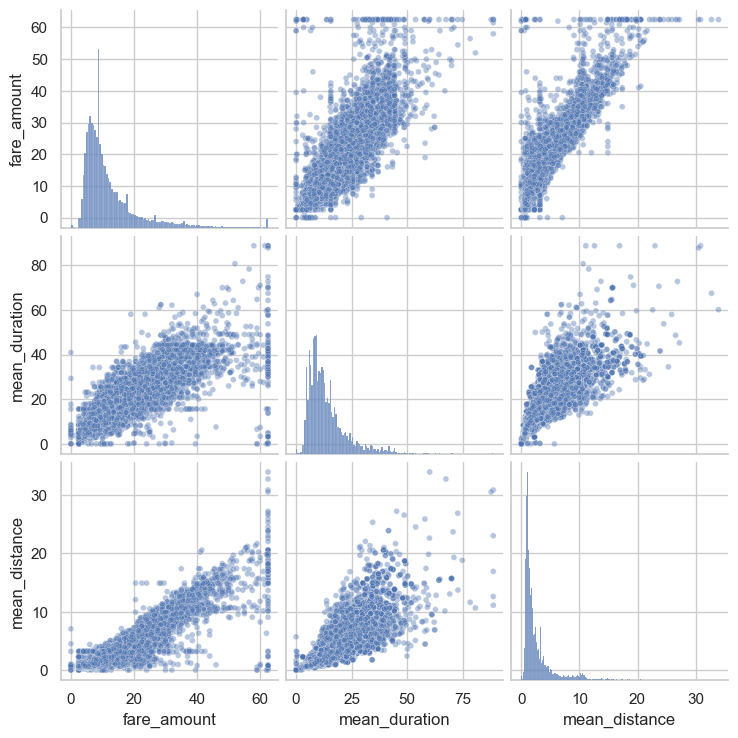

In [45]:
# Create a pairplot
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance',]],
             plot_kws={'alpha':0.4, 'size':5},
             );

These variables display significant linear multicollinearity, necessitating additional analysis.

In [46]:
# Compute the Pearson correlation matrix to assess linear relationships
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_duration,mean_distance,rush_hour
VendorID,1.000000,0.267588,-0.003935,-0.002209,0.000615,-0.002814
passenger_count,0.267588,1.000000,0.013443,0.014262,0.012436,-0.023046
fare_amount,-0.003935,0.013443,1.000000,0.847988,0.904079,-0.027184
mean_duration,-0.002209,0.014262,0.847988,1.000000,0.847113,-0.030633
mean_distance,0.000615,0.012436,0.904079,0.847113,1.000000,-0.055347
rush_hour,-0.002814,-0.023046,-0.027184,-0.030633,-0.055347,1.000000


Visualize this matrix with a heatmap:

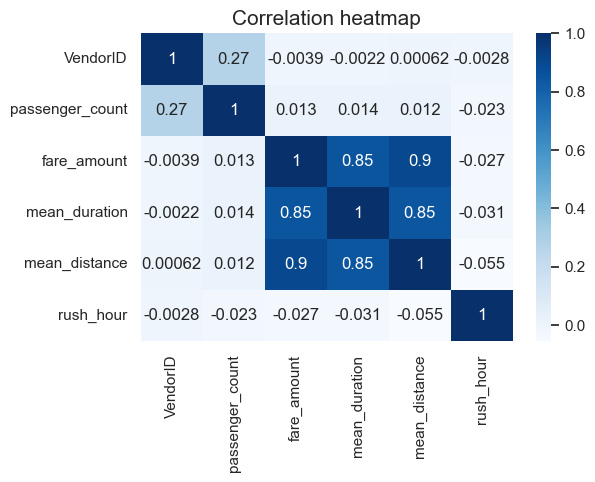

In [47]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation heatmap',
          fontsize=15)
plt.show()

`mean_duration` and `mean_distance` strongly correlate with target variable `fare_amount`, and each other (Pearson correlation: 0.85).

Highly correlated predictors can hinder statistical inference for linear regression models, but may not impact predictive accuracy.  This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, proceeding to model with both variables despite having multicollinearity.

## Part 2: Model Building and Evaluation

1. Isolate features from target variable (`fare_amount`)
2. Data Transformations: Dummy Encoding
3. Create training/holdout sets
4. Prevent Data Leakage - Recreate mean columns
5. Standardize training data
6. Fit the model to the standardized training data
7. Evaluate model readiness by assessing performance metrics on the training data
8. Test the model

#### Prepare data and fit the model

In [48]:
# Isolate the features (X)
# Temporarily exclude columns likely to cause data leakage from the training dataset.  These will be recalculated on training and test sets
# Original columns will be reintroduced during comprehensive testing
dl_cols = df2[['mean_duration','mean_distance']]
X = df2.drop(columns=['fare_amount','mean_duration','mean_distance'])

# Isolate target variable (y)
y = df2[['fare_amount']]

##### Dummy encode categorical variables

In [49]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,rush_hour,VendorID_2
0,6,0,True
1,1,0,False
2,1,1,False
3,1,0,True
4,1,0,True


##### Create training and holdout sets

In [50]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Prevent data leakage


Recreate mean columns specific to training and test sets, to avoid data leakage from full dataset mean columns

In [51]:
# Get auxiliary columns to build mean columns
X_train = X_train.join(df1[['pickup_dropoff','duration','trip_distance']])
X_test = X_test.join(df1[['pickup_dropoff','duration','trip_distance']])

In [52]:
# Training's mean_duration:
# Use auxiliary column to create a df of mean trip durations per pickup/dropoff group
grouped = X_train.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Convert grouped df to dictionary, which will contain the unique id pair (key) and mean duration (value).
grouped_dict = grouped.to_dict()
# Reassign to remove duration as a key (removes the key name)
grouped_dict = grouped_dict['duration']

# Create a mean_duration column that is a copy of the pickup_dropoff auxiliary column
X_train['mean_duration'] = X_train['pickup_dropoff']
# Map `grouped_dict` to the `mean_duration` column
X_train['mean_duration'] = X_train['mean_duration'].map(grouped_dict)

In [53]:
# Test's mean_duration:
# Use auxiliary column to create a df of mean trip durations per pickup/dropoff group
grouped = X_test.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Convert grouped df to dictionary, which will contain the unique id pair (key) and mean duration (value).
grouped_dict = grouped.to_dict()
# Reassign to remove duration as a key (removes the key name)
grouped_dict = grouped_dict['duration']

# Create a mean_duration column that is a copy of the pickup_dropoff auxiliary column
X_test['mean_duration'] = X_test['pickup_dropoff']
# Map `grouped_dict` to the `mean_duration` column
X_test['mean_duration'] = X_test['mean_duration'].map(grouped_dict)

In [54]:
# Training's mean_distance:
# Use auxiliary column to create a df of mean trip distances per pickup/dropoff group
grouped = X_train.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

# Convert grouped df to dictionary, which will contain the unique id pair (key) and mean distance (value).
grouped_dict = grouped.to_dict()
# Reassign to remove the trip_distance as a key (removes the key name)
grouped_dict = grouped_dict['trip_distance']

# Create a mean_distance column that is a copy of the pickup_dropoff auxiliary column
X_train['mean_distance'] = X_train['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
X_train['mean_distance'] = X_train['mean_distance'].map(grouped_dict)

In [55]:
# Test's mean_distance:
# Use auxiliary column to create a df of mean trip distances per pickup/dropoff group
grouped = X_test.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

# Convert grouped df to dictionary, which will contain the unique id pair (key) and mean distance (value).
grouped_dict = grouped.to_dict()
# Reassign to remove the trip_distance as a key (removes the key name)
grouped_dict = grouped_dict['trip_distance']

# Create a mean_distance column that is a copy of the pickup_dropoff auxiliary column
X_test['mean_distance'] = X_test['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
X_test['mean_distance'] = X_test['mean_distance'].map(grouped_dict)

In [56]:
#drop the columns brought in to recreate mean columns
X_train = X_train.drop(columns=['pickup_dropoff','duration','trip_distance'])
X_test = X_test.drop(columns=['pickup_dropoff','duration','trip_distance'])

##### Standardize training data

In [57]:
# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.49798663  1.54082591 -1.11066496  0.89817058  0.38149498]
 [ 1.83318974 -0.64900259  0.90036153 -0.53695571 -0.30176566]
 [-0.49798663  1.54082591  0.90036153 -0.1795681  -0.03406755]
 ...
 [-0.49798663 -0.64900259 -1.11066496 -0.17122276 -0.57946412]
 [-0.49798663 -0.64900259  0.90036153 -0.27705655 -0.48416202]
 [-0.49798663 -0.64900259 -1.11066496  1.18348429  2.385829  ]]


##### Fit the model to the standardized training data

In [58]:
# Instantiate
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Evaluate Model

Assess model performance on training data to determine next steps.

In [59]:
results_table = pd.DataFrame(columns=['Data Set','R2', 'MAE', 'MSE', 'RMSE'])

In [60]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)

# get scores
R2 = r2_score(y_train, y_pred_train)
MAE =  mean_absolute_error(y_train, y_pred_train)
MSE =  mean_squared_error(y_train, y_pred_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train))
dl_label = 'Train'

# Save scores to results table
new_row = {'Data Set': dl_label, 'R2': R2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
results_table.loc[len(results_table)] = new_row

# display results
results_table[results_table['Data Set'] == 'Train']


Coefficient of determination: 0.8464372863632376


,Data Set,R2,MAE,MSE,RMSE
0,Train,0.846437,1.956124,12.0319,3.468703


With an R<sup>2</sup> of 0.85, the model indicates a substantial linear association between the independent variables and the dependent variable.  Proceed to testing using a linear model.

#### Test

##### Transform and evaluate on test data

In [61]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [62]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)

# get scores
R2 = r2_score(y_test, y_pred_test)
MAE =  mean_absolute_error(y_test,y_pred_test)
MSE =  mean_squared_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
dl_label = 'Test'

# Save scores to results table
new_row = {'Data Set': dl_label, 'R2': R2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
results_table.loc[len(results_table)] = new_row

# display results
results_table[results_table['Data Set'] == 'Test']

Coefficient of determination: 0.8557500508838527


,Data Set,R2,MAE,MSE,RMSE
1,Test,0.85575,1.639343,10.690155,3.26958


With an R<sup>2</sup> of 0.86, the model performed slightly better on the test data than on the training data.

## Part 3: Interpreting Model Results, Conduct Final Model Evaluation

1. Visualize model test results/Check assumptions
2. Interpret the model
3. Predict on full dataset
4. Evaluate performance on full dataset

As mentioned, the model demonstrates good performance on training data and even better performance on the test data, and indicates a low risk of overfitting or bias. The model explains 86% of the variability in fare amounts, as evidenced by the R<sup>2</sup> value of 0.856 on the test data.

##### Visualize model test results

In [63]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
18484,10.0,9.976079,0.023921
10872,4.0,4.087230,-0.087230
15776,13.5,7.476687,6.023313
13639,9.5,9.041742,0.458258
18446,12.5,7.714155,4.785845


Scatterplot to visualize `actual` vs. `predicted`

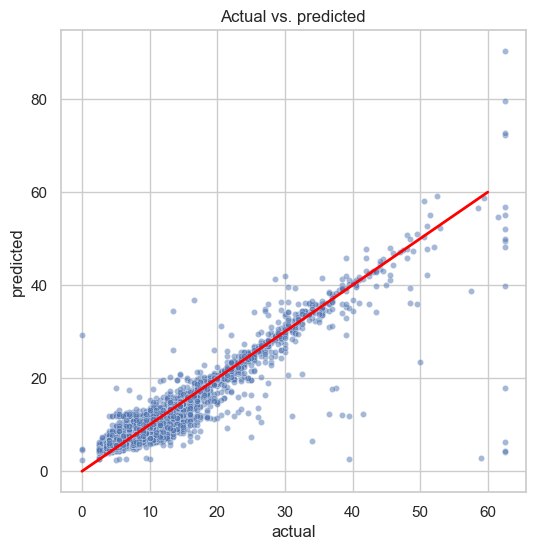

In [64]:
# Create a scatterplot to visualize `actual` vs `predicted`
fig, ax = plt.subplots(figsize=(6, 6))

sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax)

# Include a perfect prediction x=y line for comparison
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Error Normality: Visualize the distribution of the `residuals` using a histogram:

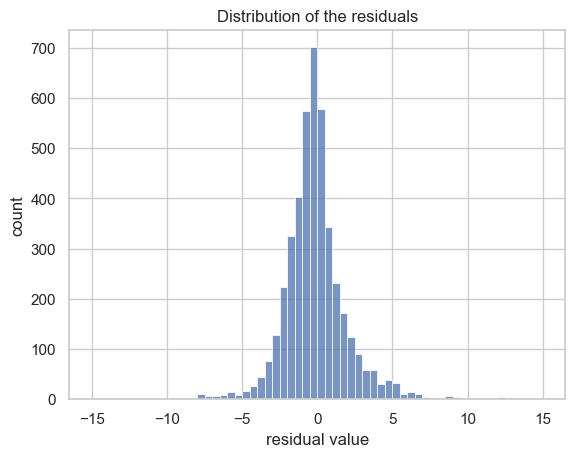

In [65]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [66]:
results['residual'].mean()

-0.021621802439228816

The model's residuals are normally distributed around a mean of nearly zero, suggesting unbiased predictions.

Create `residuals` versus `predictor` plot to check homoscedasticity:

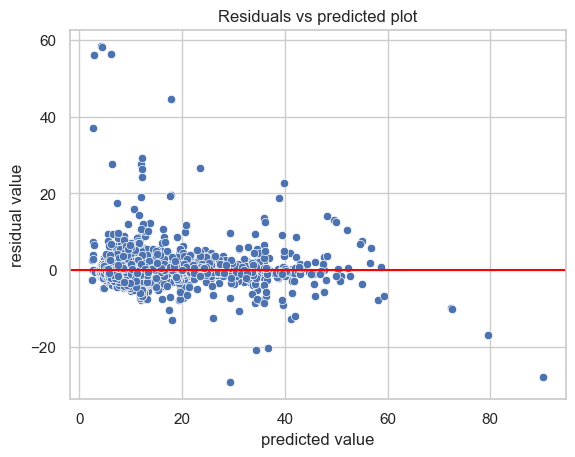

In [67]:
# Create a scatterplot of `residuals` vs `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Residuals vs predicted plot')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

Residuals are evenly dispersed around zero, except for distinct patterns corresponding to the imputed capped fare amount of \\$62.50.

##### Interpret the model

In [68]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X_train.columns)
coefficients

,passenger_count,rush_hour,VendorID_2,mean_duration,mean_distance
0,0.03782,0.146235,-0.040246,2.51172,5.922049


Mean distance was the most influential factor in determining the final prediction, as the coefficients show that it was the feature with the greatest weight.  Mean duration was the second-most influential factor.

In [69]:
# get the scaled, most influential variable
highest_weight = coefficients.iloc[0].max()
highest_weight_lbl = coefficients.iloc[0].idxmax()

print('Most Influential Factor: ', highest_weight_lbl)
print('Most Influential Factor Coef:', highest_weight)

Most Influential Factor:  mean_distance
Most Influential Factor Coef: 5.922048950164314


The training data was standardized, therefore a more intuitive interpretation is to unscale the results:

In [70]:
# "Unscale" the coefficient

# 1. Calculate SD of highest weight coefficient in training data
sd = X_train[highest_weight_lbl].std()
print('Standard Deviation for ' + highest_weight_lbl + ':', sd)

# 2. Divide the coefficient by the standard deviation
unit = highest_weight / sd
print('Most Influential Factor Coef Unscaled:', unit)

Standard Deviation for mean_distance: 2.8266467426691495
Most Influential Factor Coef Unscaled: 2.0950792544286005


Scaled interpretation:
- Controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of \\$5.92.  In other words, for every 2.83 miles traveled, the fare increased by a mean of \\$5.92.

Unscaled interpretation, reduced:
- For every 1 mile traveled, the fare increased by $2.10 on average.

##### Predict on full dataset

In [71]:
#Add back the original mean columns to X, removed for training/testing
X = X.join(dl_cols)

In [72]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

##### Evaluate performance on full dataset

In [73]:
R2 = r2_score(y, y_preds_full)
MAE =  mean_absolute_error(y, y_preds_full)
MSE =  mean_squared_error(y, y_preds_full)
RMSE = np.sqrt(mean_squared_error(y, y_preds_full))
ds_label = "Full"

# Save scores to results table
new_row = {'Data Set': ds_label, 'R2': R2, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
results_table.loc[len(results_table)] = new_row

# display results
results_table[results_table['Data Set' ] == "Full"]

,Data Set,R2,MAE,MSE,RMSE
2,Full,0.84157,1.995157,12.279681,3.504238


As mean distance and mean duration were identified as the primary determinants, we should concentrate our final predictions on comparing these two factors.

In [74]:
# Combine means columns with predictions column
nyc_preds_means = df1[['Unnamed: 0','mean_distance', 'mean_duration']].copy()
nyc_preds_means['predicted_fare'] = y_preds_full

nyc_preds_means.head()

,Unnamed: 0,mean_distance,mean_duration,predicted_fare
0,24870114,3.521667,22.847222,16.535056
1,35634249,3.108889,24.470370,16.066772
2,106203690,0.881429,7.250000,6.812863
3,38942136,3.700000,30.250000,18.871322
4,30841670,4.435000,14.616667,15.956207


Save the predictions of the full dataset:

In [75]:
nyc_preds_means.to_csv('data\\nyc_preds_means.csv')

## Part 4: Conclusion

In [76]:
# display all results
results_table

,Data Set,R2,MAE,MSE,RMSE
0,Train,0.846437,1.956124,12.031900,3.468703
1,Test,0.855750,1.639343,10.690155,3.269580
2,Full,0.841570,1.995157,12.279681,3.504238


The model performance is high on all data sets, suggesting that the model is not over-biased and that the model is not overfit.

Results:
- Imputing outliers optimized the model, specifically in regards to the variables of fare amount and duration.
- Distance emerged as the most significant factor influencing fare amount, as anticipated. The model indicated an average fare increase of \\$2.10 for each additional mile traveled.
- Model metrics, full dataset:
    - R<sup>2</sup>: 0.84, meaning that 84.2% of the variance is described by this model.
    - MAE: 2.0
    - MSE: 12.28
    - RMSE: 3.50

This model can be used to predict the fare amount of taxi cab rides with reasonable confidence.